# Newman Mixture Model for directed graphs with EM inference
**Based on the paper "Mixture models and exploratory analysis in networks" from M. E. J. Newman and E. A. Leicht. arXiv:physics/0611158 [physics.data-an]**

**Remark**: The Mixture model proposed by Newman and Leicht differs from the classical stochastic block model parametrization, particularly, this mixture model parametrize with $\theta_{ri}$ the probability of a node in cluster r to link with node i. Hence to retrieve a stochastic block model, we've compute the $\pi_{rl} = \sum_{i\in l} \theta_{ri}$, wich is the probability of a node in cluster r to link with a node in cluster l. With this we parametrize the stochastic block model, and even thuogh we're losing this distinct aspect of nodes between the same cluster, we are able like to retrieve a stochastic block structure that we can sample out graphs of any size.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import src.NewmanMixtureModel as NewmanMixtureModel
# import CommunityGraph from ../CommunityGraph
import src.CommunitiesGraph as CG

from importlib import reload

**Karatee Dataset Load**

<class 'networkx.classes.graph.Graph'>
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Number of classes:  2


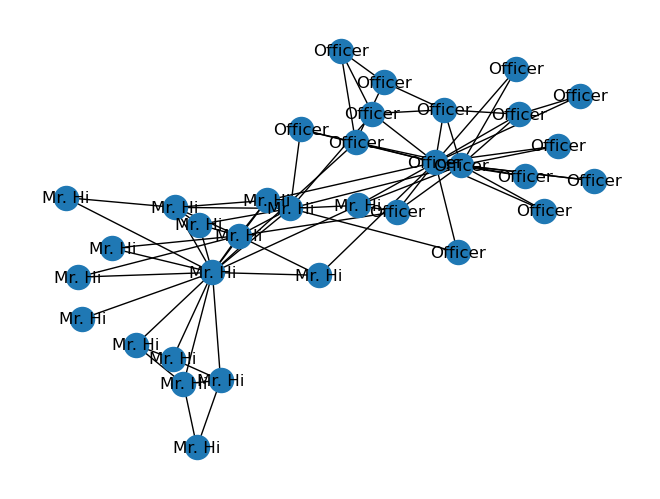

In [6]:
# Karate Club Network
G = nx.karate_club_graph()
print(type(G))

# print caracteristics of the network
print(G)
print("Number of classes: ", len(set(nx.get_node_attributes(G, 'club').values())))

# plot the network
nx.draw(G, labels=nx.get_node_attributes(G, 'club'), with_labels=True)
plt.show()

**Model Init**

In [15]:
reload(NewmanMixtureModel)
# Fit the Newman Mixture Model
# Fit the Newman Mixture Model to the network
# The model is fitted with 4 classes
model = NewmanMixtureModel.NewmanMixtureModel(nx.adjacency_matrix(G).todense(), 2)

**Fitting the model to Karatee**

In [16]:
model.fit(nx.adjacency_matrix(G).todense(), 2)

Norm of difference between q and q_old: 0.0007181874680654003
EM algorithm converged after 24 iterations.


array([[5.94048943e-02, 3.78820751e-02, 2.34420297e-02, 2.52606340e-02,
        1.26303170e-02, 1.68404226e-02, 1.68404226e-02, 1.68404226e-02,
        1.26221195e-02, 4.21010566e-03, 1.26303170e-02, 4.21010566e-03,
        8.42021132e-03, 1.68404226e-02, 0.00000000e+00, 0.00000000e+00,
        8.42021132e-03, 8.42021132e-03, 0.00000000e+00, 8.42021132e-03,
        0.00000000e+00, 8.42021132e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.29713542e-35, 0.00000000e+00, 4.21010566e-03,
        4.21010566e-03, 1.28857004e-24, 5.15337083e-03, 4.51098200e-03,
        1.09622491e-02, 1.66201595e-02],
       [8.41927717e-03, 9.39169329e-06, 1.97435643e-02, 9.80289008e-39,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.91830170e-03, 4.45481387e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.45481387e-03, 8.90962773e-03, 8.90962773e-03,
        0.00000000e+00, 0.00000000e+00, 8.90962773e-03, 4.45481387e-03,
        8.90962773e-03,

**Ploting the result**

In [17]:
print("Classes: ", model.labels)
print("Karatee labels: ", nx.get_node_attributes(G, 'club').values())
# Karatee

Classes:  [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1]
Karatee labels:  dict_values(['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer'])


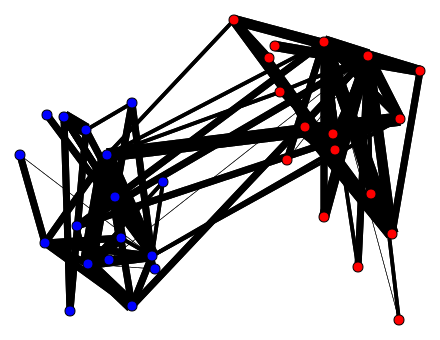

In [18]:
model.display(edge_width= 0.005)

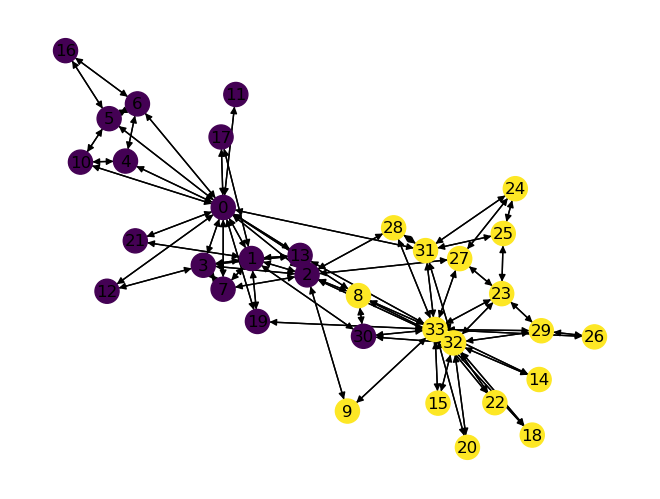

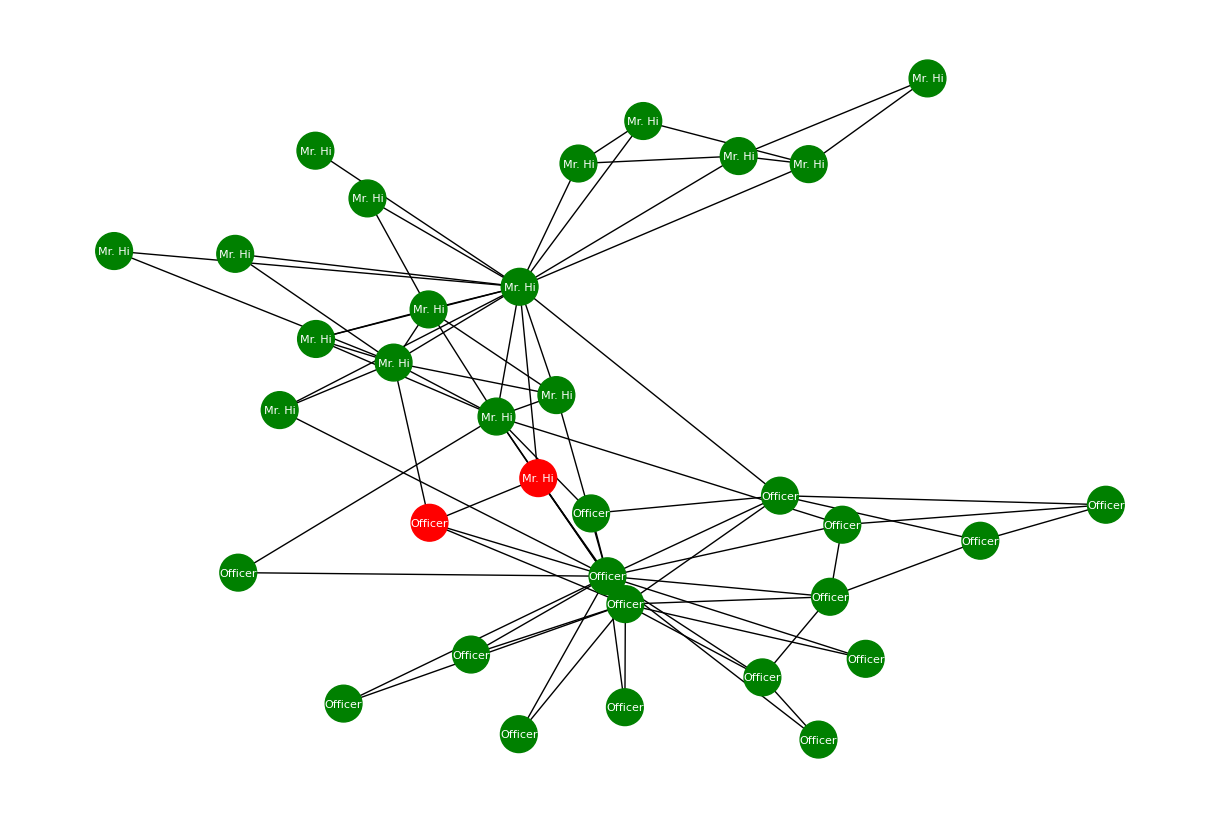

In [20]:
#plot graph from adjacency matrix
# Colored clusters 
nx.draw(nx.DiGraph(model.A), node_color=model.labels, with_labels=True)
plt.show()

color = [0 if x == 'Mr. Hi' else 1 for x in nx.get_node_attributes(G, 'club').values()]
colors = ['g' if x == model.labels[i] else 'r' for i, x in enumerate(color)]

# Colored classes
plt.figure(figsize=(12, 8))
nx.draw(nx.Graph(model.A), node_color=colors, labels=nx.get_node_attributes(G, 'club'), with_labels=True, node_size=700, font_size=8, font_color='white')
#plot legend
plt.show()

In [21]:
print("Accuracy: ", np.mean(model.labels == color))

Accuracy:  0.9411764705882353


In [22]:
# print propierties of node 8
print("Node 8: ", G.nodes[8])

Node 8:  {'club': 'Mr. Hi'}


**Creating syntethic graph communities dataset**

In [25]:
# Import dataset4
n_community=5
p=0.1
q=0.7
n=125
dataset = CG.BaseCommunitiesGraph(n_community, p, q, n)

TypeError: __init__() missing 1 required positional argument: 'cf'

In [26]:
dataset.print_properties()

NameError: name 'dataset' is not defined

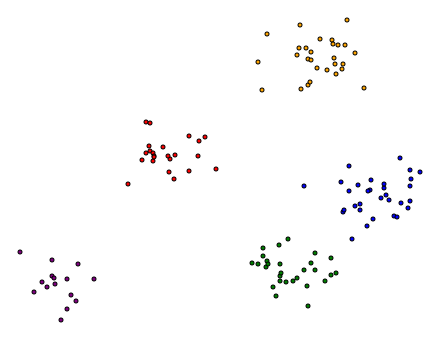

In [12]:
dataset.display(labels = dataset.labels)

**Fit the dataset to the model**

In [39]:
reload(NewmanMixtureModel)

# Fit the Newman Mixture Model
# Fit the Newman Mixture Model to the network
# The model is fitted with 4 classes
model = NewmanMixtureModel.NewmanMixtureModel(dataset.adjacency, 5)

In [14]:
theta = model.fit(dataset.adjacency, 5)


Norm of difference between q and q_old: 9.526397254749314e-06
EM algorithm converged after 7 iterations.


In [15]:
print("Classes: ", model.labels)
print("GT labels: ", dataset.labels)

Classes:  [0 1 4 3 3 3 3 3 3 1 0 3 2 2 1 4 0 0 0 3 4 2 3 3 3 3 1 1 4 2 3 3 4 3 4 3 4
 3 0 1 2 1 1 3 3 2 3 1 1 1 1 2 4 0 3 4 3 2 3 4 4 4 1 2 1 2 2 4 4 1 1 4 2 0
 1 3 1 2 4 4 4 4 3 2 3 1 3 0 2 1 0 1 4 1 2 4 4 1 2 3 2 0 0 1 1 1 1 2 2 2 2
 0 4 4 4 3 2 0 0 4 3 4 3 4 1]
GT labels:  [4 3 2 0 0 0 0 0 0 3 4 0 1 1 3 2 4 4 4 0 2 1 0 0 0 0 3 3 2 1 0 0 2 0 2 0 2
 0 4 3 1 3 3 0 0 1 0 3 3 3 3 1 2 4 0 2 0 1 0 2 2 2 3 1 3 1 1 2 2 3 3 2 1 4
 3 0 3 1 2 2 2 2 0 1 0 3 0 4 1 3 4 3 2 3 1 2 2 3 1 0 1 4 4 3 3 3 3 1 1 1 1
 4 2 2 2 0 1 4 4 2 0 2 0 2 3]


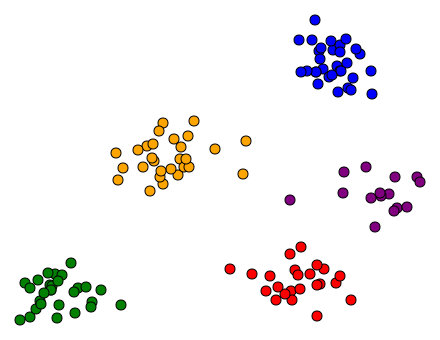

In [16]:
model.display(edge_width= 0.05, labels = dataset.labels)

**Sampling a Graph from the SBM structure**

In [17]:
model.generate(15)

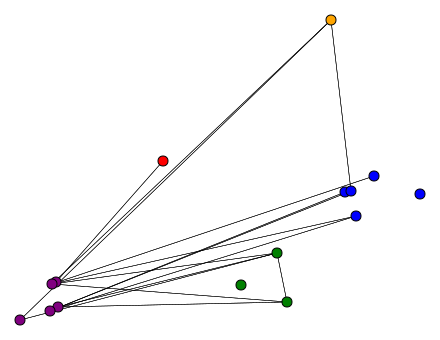

In [18]:
model.display()

**Test it on the Keystone graph**

In [63]:
import keystonesGraph as KG


In [64]:
reload(KG)

# Generate keystones graph
G = KG.keystones_graph()

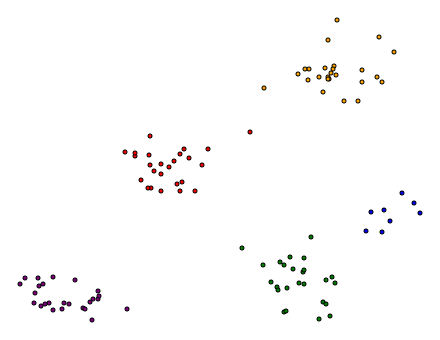

In [65]:
G.display()

In [66]:

from scipy import sparse

from IPython.display import display, SVG
from sknetwork.visualization import svg_graph

def positions(nodes, clusters):
    position = np.zeros( (108,2) )
    n_community = len(set(clusters))
    for i in range(len(nodes)):
        c = clusters[i]
        position[i,:] = (np.random.multivariate_normal( [np.round(1+c/n_community)*np.cos(2*np.pi*2*c/n_community),np.round(1+c/n_community)*np.sin(2*np.pi*2*c/n_community)],
                                                        0.05*np.eye(2)))
    
    return position

In [67]:
# Fit the Newman Mixture Model
model = NewmanMixtureModel.NewmanMixtureModel(G.adjacency, 5)

In [68]:
a = model.fit(G.adjacency, 5)

Norm of difference between q and q_old: 0.00019366467164932857
EM algorithm converged after 16 iterations.


In [69]:
print("Classes: ", model.labels)
print("GT labels: ", G.group)

Classes:  [3 3 2 3 3 4 4 1 3 0 3 3 4 1 4 4 3 1 4 1 4 4 4 2 2 1 1 2 1 0 1 3 1 4 1 4 1
 4 4 4 0 1 2 2 4 2 4 4 2 1 3 0 2 0 3 2 0 1 1 2 0 2 0 1 1 0 3 1 0 0 0 1 0 2
 0 3 3 2 0 3 3 1 3 2 3 2 0 3 3 1 3 1 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3]
GT labels:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
# Position of nodes
position = positions(np.arange(G.adjacency.shape[0]), G.group)

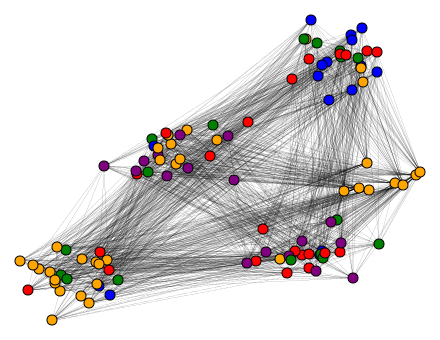

In [71]:
model.display(edge_width= 0.1, labels= model.labels, position = position)

__Book of US politics dataset__

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import src.NewmanMixtureModel as NewmanMixtureModel
from importlib import reload

reload(NewmanMixtureModel)

G = nx.read_gml('polbooks.gml', label=None)

# remove neutral nodes (irrelevant)
for i in list(G.nodes()):
    if G.nodes[i]['value'] == 'n':
        G.remove_node(i)

real_cluster = [G.nodes[i]['value'] for i in list(G.nodes())]

model = NewmanMixtureModel.NewmanMixtureModel(nx.adjacency_matrix(G).toarray(), 2)
model.fit(nx.adjacency_matrix(G).toarray(), 2)

Norm of difference between q and q_old: 0.00040965446742375147
EM algorithm converged after 11 iterations.


array([[0.00000000e+00, 0.00000000e+00, 5.99821976e-30, 3.70811938e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.68817105e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.68817105e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.56989078e-02, 2.15053684e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.06451314e-03, 2.68817105e-03, 5.37634209e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.61290263e-02, 1.34408552e-02, 1.61290263e-02,
        1.07526842e-02, 1.61290263e-02, 1.07526842e-02, 1.612902

In [7]:
# G: networkx graph
# real_clustering: list of real cluster labels same order as node list of networkx
# predicted_clustering: list of predicted cluster labels same order as node list of networkx

def plot_networkx_cluster(G, real_clustering, predicted_clustering):
    n_cluster = len(np.unique(real_clustering))
    nodes = list(G.nodes)

    # POSITIONING NODES BY REAL CLUSTERS

    # List of list of nodes in the same cluster (real clustering)
    real_communities = [[nodes[j] for j in range(G.number_of_nodes()) if real_clustering[j] == i] for i in np.unique(real_clustering)]

    plt.figure(figsize=(7,7))

    cluster_centers = list(nx.circular_layout(nx.cycle_graph(n_cluster)).values())
    pos = {}
    for center, comm in zip(cluster_centers, real_communities):
        pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, scale=0.5))

    # COLORING NODES BY PREDICTED CLUSTERS

    colors = ["tab:green", "tab:red", "tab:purple", "tab:blue", "tab:orange", "tab:olive", "tab:pink"]

    # List of list of nodes in the same cluster (predicted clustering)
    predicted_communities = [[nodes[j] for j in range(G.number_of_nodes()) if predicted_clustering[j] == i] for i in np.unique(predicted_clustering)]

    for nodes, clr in zip(predicted_communities, colors):
        nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=50)
    nx.draw_networkx_edges(G, pos=pos, width=0.2)

    plt.show()

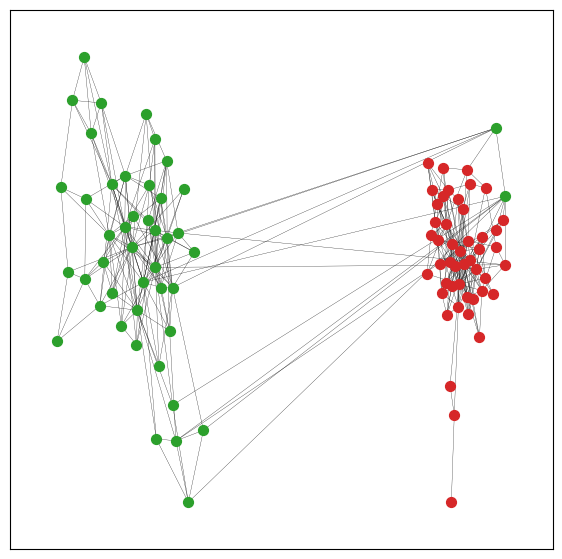

In [14]:
plot_networkx_cluster(G, real_cluster, model.labels)